https://blog.csdn.net/m0_67587806/article/details/128099265

['db1', 'db2', 'db3', 'db4', 'db5']


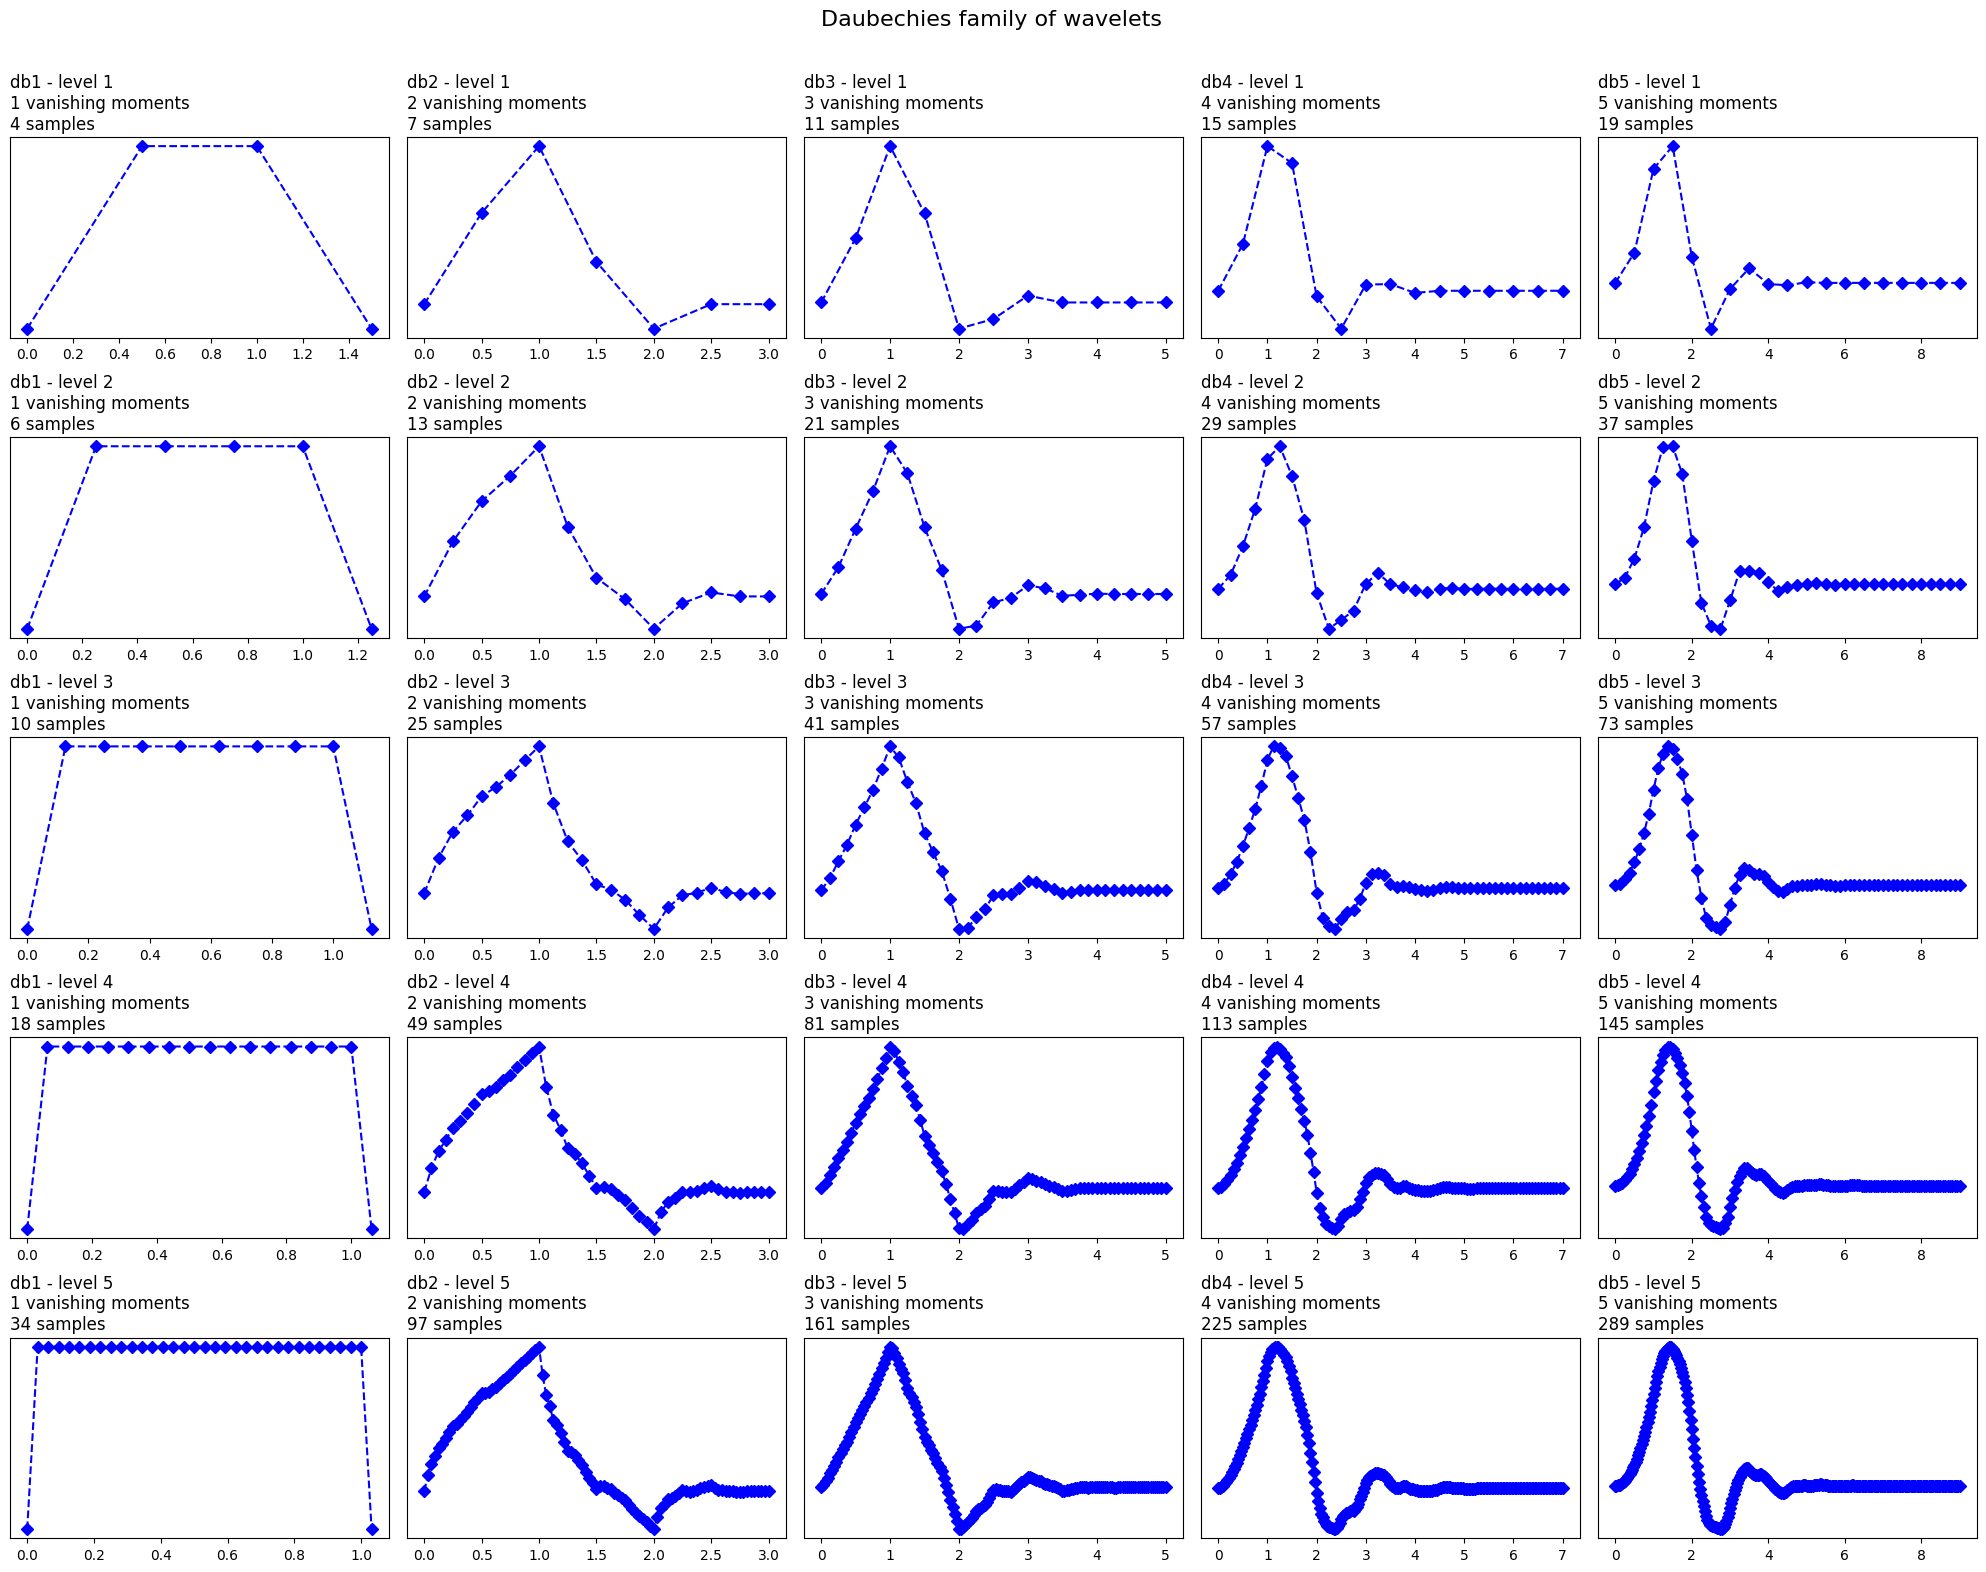

In [7]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

db_wavelets = pywt.wavelist('db')[:5]
print(db_wavelets)
### ['db1', 'db2', 'db3', 'db4', 'db5']
 
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


ContinuousWavelet cgau1
  Family name:    Complex Gaussian wavelets
  Short name:     cgau
  Symmetry:       anti-symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True
ContinuousWavelet cgau3
  Family name:    Complex Gaussian wavelets
  Short name:     cgau
  Symmetry:       anti-symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True
ContinuousWavelet cgau4
  Family name:    Complex Gaussian wavelets
  Short name:     cgau
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True
1
ContinuousWavelet cgau5
  Family name:    Complex Gaussian wavelets
  Short name:     cgau
  Symmetry:       anti-symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True
ContinuousWavelet cgau7
  Family name:    Complex Gaussian wavelets
  Short name:     cgau
  Symmetry:       anti-symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True
ContinuousWavelet cgau8
  Family 

/home/wuzm/anaconda3/envs/base_archive/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/wuzm/anaconda3/envs/base_archive/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_1842322/2266853883.py:9: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  cwt = pywt.ContinuousWavelet(wave)
/tmp/ipykernel_1842322/2266853883.py:9: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and

ContinuousWavelet gaus7
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       anti-symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False
ContinuousWavelet gaus8
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False
6
ContinuousWavelet mexh
  Family name:    Mexican hat wavelet
  Short name:     mexh
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False
7
ContinuousWavelet morl
  Family name:    Morlet wavelet
  Short name:     morl
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False
8


/tmp/ipykernel_1842322/2266853883.py:9: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  cwt = pywt.ContinuousWavelet(wave)


ContinuousWavelet shan
  Family name:    Shannon wavelets
  Short name:     shan
  Symmetry:       asymmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


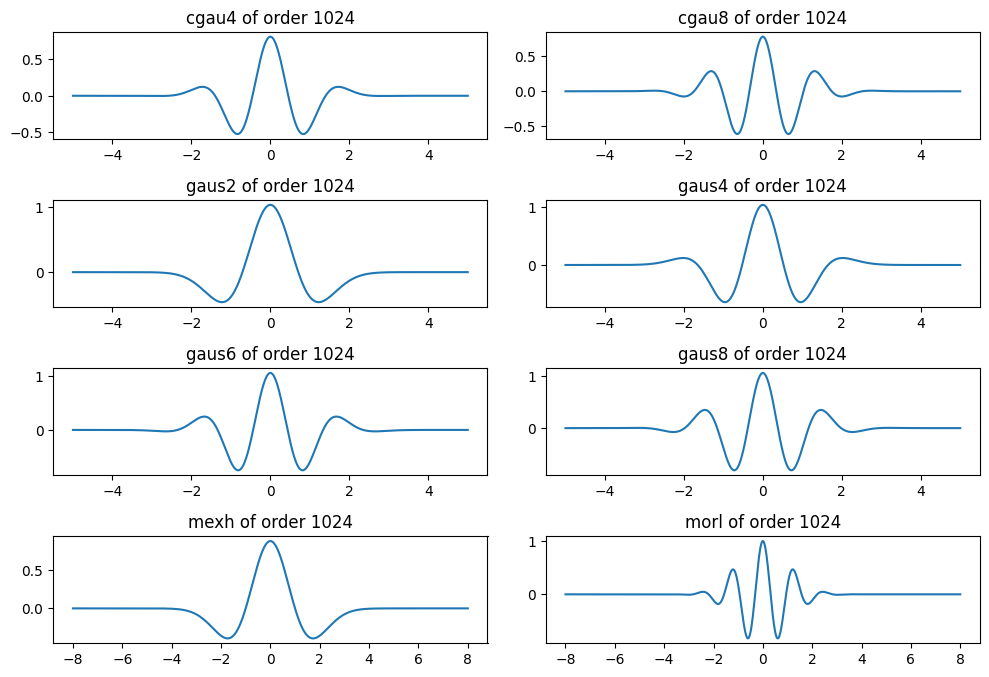

In [8]:
#选择对称且连续的小波类型
import pywt
count=0
fig=plt.figure(figsize=(10, 10))
for wave in pywt.wavelist(kind='continuous'):
    if wave in ['cgau2','cgau6']:
        continue
    else:
        cwt = pywt.ContinuousWavelet(wave) 
        print(cwt)
        if cwt.symmetry=='symmetric':
            [psi,xval] = cwt.wavefun(level=10)#或者写length=1024 
            count += 1 
            # count_list.append(count)
            print(count)
            # 画子图
            ax = fig.add_subplot(6, 2, count)
            ax.plot(xval,psi)
            ax.set_title("{} of order 1024".format(wave))
            plt.tight_layout()
plt.show()


In [9]:
#二维时频图
#1.2.3为参数，y为参数
sr=128 #1.sampling rate
wavename = 'morl'#2.母小波名称
totalscal = 150 # 3.totalscal是对信号进行小波变换时所用尺度序列的长度(通常需要预先设定好)
fc = pywt.central_frequency(wavename)  # 计算小波函数的中心频率
cparam = 2 * fc * totalscal  # 常数c
scales = cparam / np.arange(totalscal, 1, -1)  # 为使转换后的频率序列是一等差序列，尺度序列必须取为这一形式（也即小波尺度）
[cwtmatr, frequencies] = pywt.cwt(y, scales, wavename, 1.0 / sr)#4.y为将要进行cwt变换的一维输入信号
t = np.arange(0, y.shape[0]/sr, 1.0/sr)
plt.contourf(t, frequencies, abs(cwtmatr))
plt.ylabel(u"freq(Hz)")
plt.xlabel(u"time(s)")
# plt.subplots_adjust(hspace=0.4)  # 调整边距和子图的间距 hspace为子图之间的空间保留的高度，平均轴高度的一部分
plt.title = ("小波时频图，totalscale = {}".format(i))
plt.show()


NameError: name 'y' is not defined

In [ ]:
#接上，三维时频图
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.rc('font',family='Arial') 
 
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(t, frequencies, abs(cwtmatr), 50,cmap='rainbow')
ax.tick_params(labelsize=14)
ax.set_xlabel('Translation',fontsize=22)
ax.set_ylabel('Scale',fontsize=22)
ax.set_zlabel('Amplitude',fontsize=22)

plt.show()


In [ ]:
def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()
 
def plot_signal_plus_average(time, signal, average_over = 5):
    fig, ax = plt.subplots(figsize=(15, 3))
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    plt.show()
    
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
def plot_fft_plus_power(time, signal):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    fig, ax = plt.subplots(figsize=(15, 3))
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2     # FFT power spectrum
    ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    ax.set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend()
    plt.show()
 
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()
 
scales = np.arange(1, 128)
plot_signal_plus_average(time, signal)
plot_fft_plus_power(time, signal)
plot_wavelet(time, signal, scales)


In [ ]:
import pywt
 
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()


In [ ]:
#短通滤波及信号重建,signal为一维信号序列，thresh, wavelet为可选参数
def lowpassfilter(signal, thresh = 1, wavelet="db22"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(d5.iloc[0,:], 0.9)
ax.plot(signal,rec, 'k', label='DWT smoothing', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()


二维平稳小波变换

In [10]:
import cv2
import numpy as np
import pywt
#生成图片的低频系数和高频系数
img=cv2.imread(r'/home/wuzm/data/Highway_2024_0510/output/0628_data2/trace/predict_vis_result/0_org.png', 0)
coeffs=pywt.swt2(img,'haar',level=1)
[(cA,(cH,cV,cD))]=coeffs
#生成四个子图
cv2.imwrite('ca.png',np.uint8(cA))
cv2.imwrite('ch.png',np.uint8(cH))
cv2.imwrite('cv.png',np.uint8(cV))
cv2.imwrite('cd.png',np.uint8(cD))

True